In [1]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data exploration

In [2]:
# importing the data
df = pd.read_csv('data/iris.csv')

In [12]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [13]:
df.shape

(150, 5)

The goal is to train a model to recognize the species of the flower based on four physical characteristics. These four physical characteristics will be the feature inputs to the model, and the labels in the target column will be the target values.

In [10]:
# how many labels are in the target column?
num_categories = df['target'].unique()
print(num_categories)

[0. 1. 2.]


This tree labels stands for:
   - 0. Iris Setosa
   - 1. Iris Virginica
   - 2. Iris Versicolor

# Data analysis

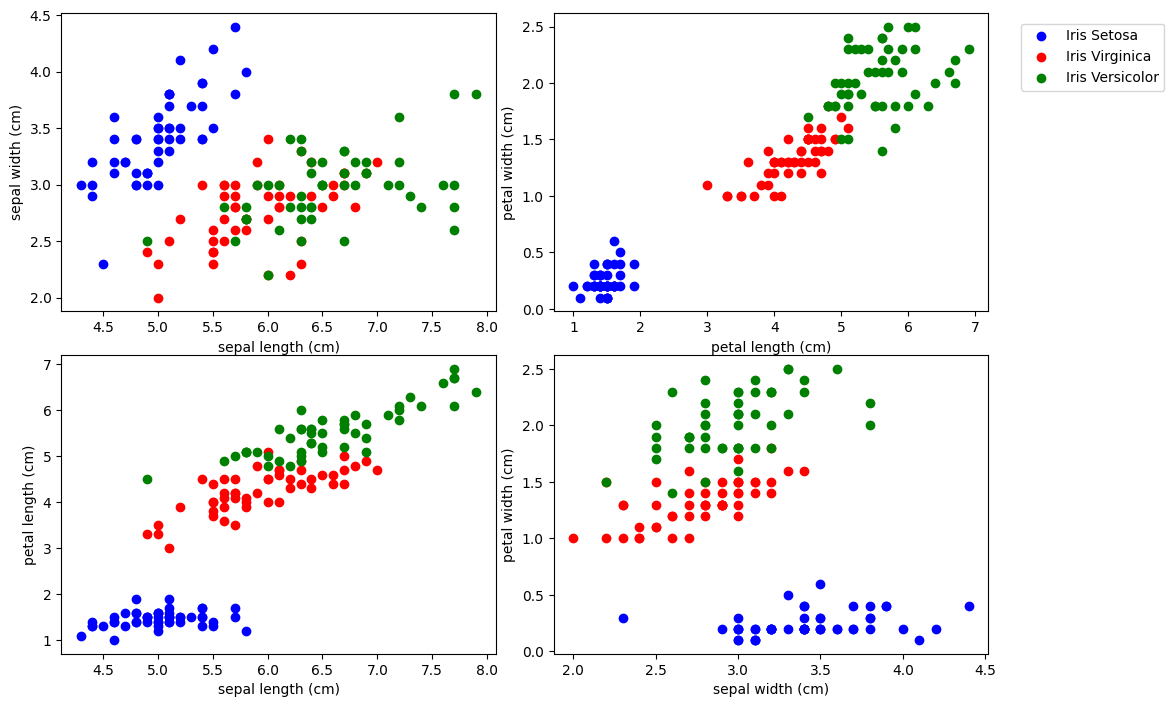

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ["Iris Setosa", "Iris Virginica", "Iris Versicolor"]

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()

# Creating the model subsets

### Sci-kit learn alternative

In [14]:
# scikit-learn alternative
from sklearn.model_selection import train_test_split

In [19]:
# features dataset (X's) (everything except the 'target' column)
features = df.drop('target', axis=1).values

# labels dataset (y) (only the 'target' column)
label = df['target'].values

# creating the training and testing subsets (20%) of the data will be used to test the model results the rest of the data will be used to train the model. 'shuffle index of the data' = random_state = 33
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=33)

In [20]:
# this recently created variables are numpy array objects that need to be converted to pt.tensors
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [21]:
# to convert to pt.tensors taking count that the x's values need to be floats and the target data (y) since the labels has unique categories, this need to be integers (long). Since each x of the inputs features are one-to-one related to the target values (y) the y tensors need to be column vectors 
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(y_train).reshape(-1,1)
Y_test = torch.LongTensor(y_test).reshape(-1,1)

### PyTorch alternative

In [ ]:
# pytorch alternative
from torch.utils.data import TensorDataset, DataLoader